In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Funciones y preparación

In [2]:
def extraer_datos(nombre,dilucion=1,pico=635,coeficiente=5.51,concentracion=True,display_only=False,label='',auto_shape=True):
    datos = pd.read_csv("Absorbancia/"+nombre,sep=';')
    datos = datos.drop(0)
    datos = datos.drop('Unnamed: 2',axis=1)
    datos = datos.astype(float)

    data = datos.to_numpy()
    data[:,1] *= dilucion
    peak = data[data[:,0]==pico]
    A = peak[0,1]
    if auto_shape: plt.figure(figsize=(12,9))
    plt.plot(data[:,0],data[:,1],label=label)
    plt.grid()
    plt.xlabel('$\lambda$ [nm]',fontsize=13)
    plt.ylabel('Absorbancia',fontsize=13)
    plt.xlim(260,1100)
    plt.ylim(0,1.1*np.amax(data[:,1]))

    C = A/coeficiente
    if not display_only: print(nombre)
    if concentracion:
        plt.vlines(pico,0,1.2*np.amax(data[:,1]),colors='black',linestyles='-.')
        if not display_only: print("Concentración: {:.3f}mg/mL".format(C))
        return C


def calcular_volumenes(C_Mos2,C_G,phi,M):
    m_G = M*phi
    V_G = m_G/C_G
    m_Mos2 = M*(1-phi)
    V_Mos2 = m_Mos2/C_Mos2
    
    return np.around(V_Mos2,decimals=3),np.around(V_G*1e3,decimals=1),

def calcular_espesor(m,phi):
    A = np.pi*(1.7/2)**2 #cm2
    rho_mos = 5.06 * 1e3 # mg/cm3
    rho_g = 2.26 * 1e3 # mg/cm3
    
    t_mos = m*(1-phi)/(rho_mos*A) *1e-2
    t_g = m*phi/(rho_g*A) *1e-2
    
    return (t_mos+t_g)*1e9

def nm_a_eV(longitud):
    cte = 2.99792458e17*4.135667516e-15
    return cte/longitud

dispersiones = {}
concentraciones = []

# Gráficas de absorbancia
## Grafeno

Absorbancia_17-08GI.csv
Concentración: 0.920mg/mL


(0.0, 40.0)

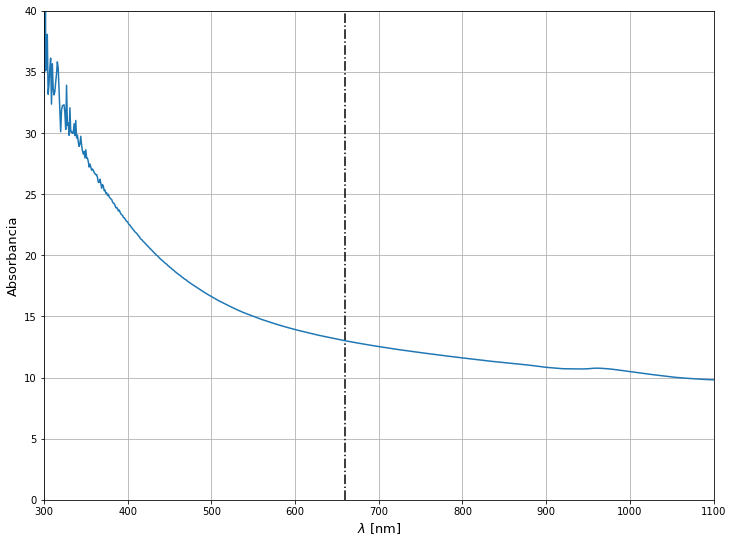

In [3]:
C_G = extraer_datos("Absorbancia_17-08GI.csv",12,660,14.14)
plt.xlim(300,1100)
plt.ylim(0,40)

Absorbancia_20-11G(16x_dil).csv
Concentración: 1.643mg/mL


(0.0, 60.0)

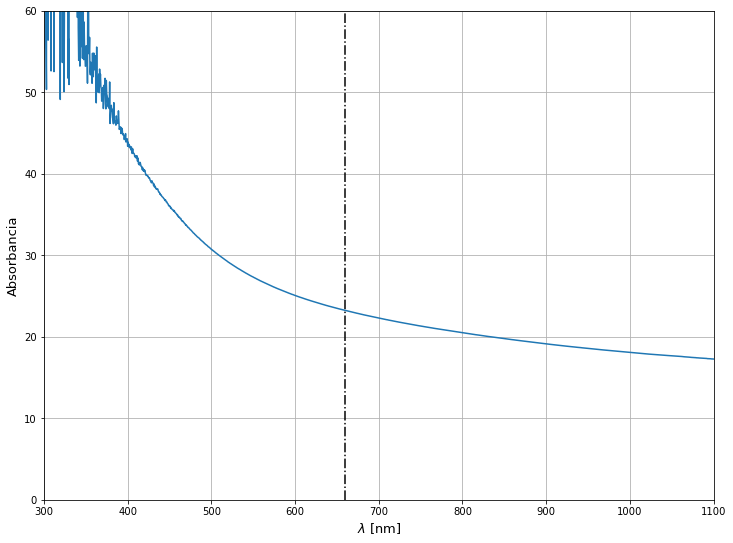

In [4]:
C_G = extraer_datos("Absorbancia_20-11G(16x_dil).csv",16,660,14.14)
plt.xlim(300,1100)
plt.ylim(0,60)

## MoS2 Bulk

Absorbancia_12-10MoS2Bulk.csv
Concentración: 0.115mg/mL


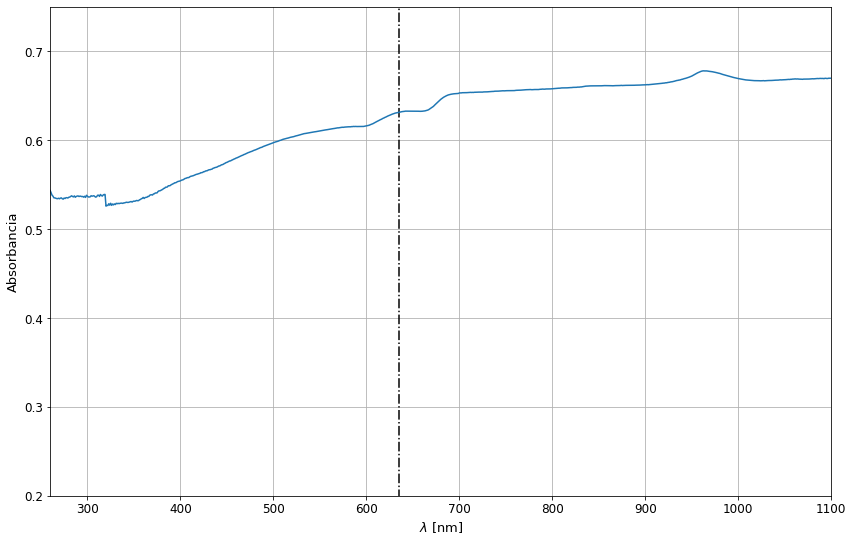

In [6]:
plt.figure(figsize=(14,9))
extraer_datos("Absorbancia_12-10MoS2Bulk.csv",auto_shape=False)
plt.ylim(0.2,0.75)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Absorbancia_MoS2Bulk.svg',bbox_inches='tight')

# eV = nm_a_eV(datos[:,0])

# plt.figure(figsize=(12,12))
# plt.plot(datos[:,0],datos[:,1])
# plt.grid()




# plt.figure(figsize=(12,12))
# plt.plot(eV,datos[:,1])
# plt.xlim(1.5,2.5)

# plt.ylim(0.525,0.625)
# plt.xlim(300,600)

Absorbancia_08-11MoS2(Sucio).csv
Concentración: 0.380mg/mL


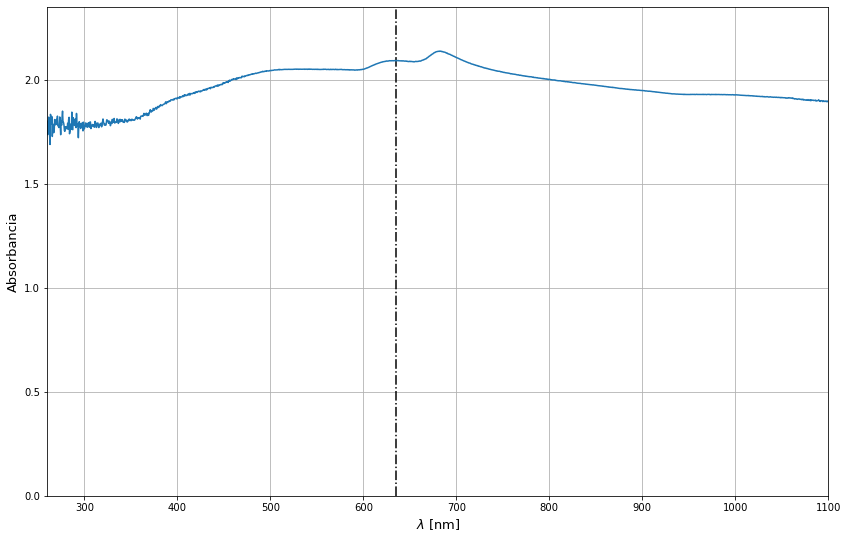

In [6]:
plt.figure(figsize=(14,9))
extraer_datos("Absorbancia_08-11MoS2(Sucio).csv",auto_shape=False)
plt.savefig('Absorbancia_MoS2Sucio.svg',bbox_inches='tight')
# plt.ylim(0.2,0.75)

## MoS2 PS

Absorbancia_19-08MoS2(2).csv
Concentración: 0.102mg/mL


(0.0, 0.8)

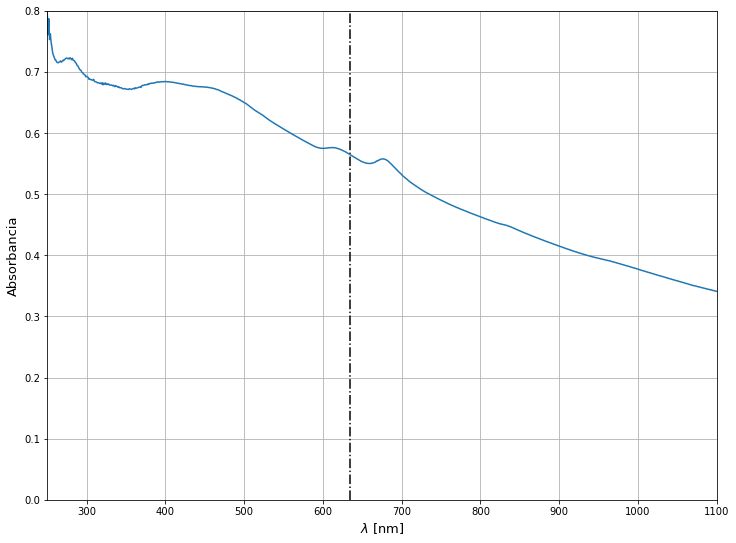

In [7]:
dispersiones['D1'] = "Absorbancia_19-08MoS2(2).csv"
C_1 = extraer_datos(dispersiones['D1'])
concentraciones.append(C_1)
plt.xlim(250,1100)
plt.ylim(0,0.8)

Absorbancia_25-08MoS2.csv
Concentración: 0.023mg/mL


(0.0, 0.155)

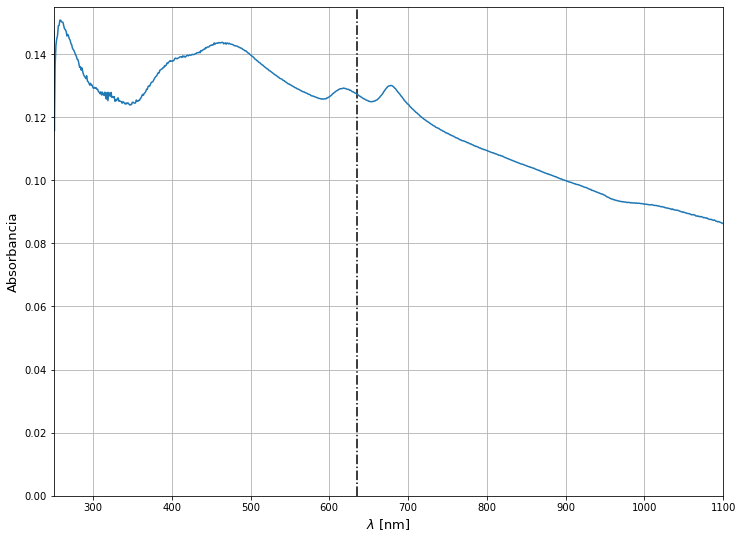

In [8]:
dispersiones['D2'] = "Absorbancia_25-08MoS2.csv"
C_2 = extraer_datos(dispersiones['D2'])
concentraciones.append(C_2)
plt.xlim(250,1100)
plt.ylim(0,0.155)

Absorbancia_26-08MoS2(True).csv
Concentración: 0.092mg/mL


(0.0, 0.58)

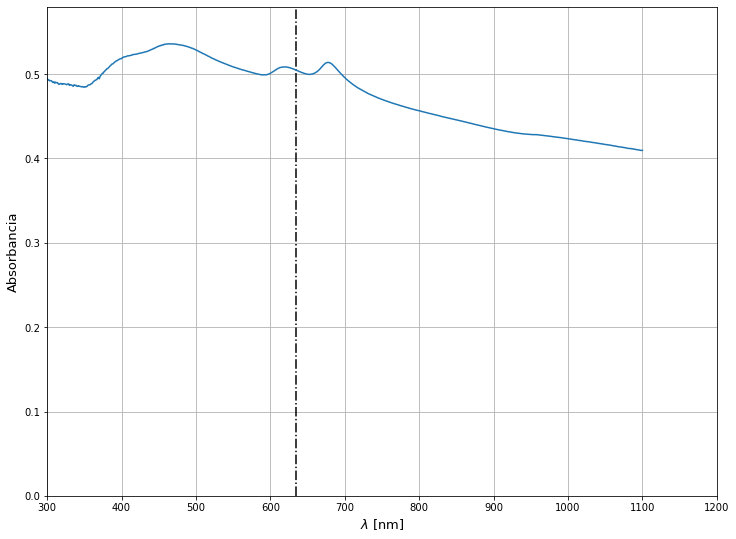

In [9]:
dispersiones["D3"] = "Absorbancia_26-08MoS2(True).csv"
C_3 = extraer_datos(dispersiones["D3"],1.)
concentraciones.append(C_3)
plt.xlim(300,1200)
plt.ylim(0,0.58)

Absorbancia_31-08MoS2.csv
Concentración: 0.050mg/mL


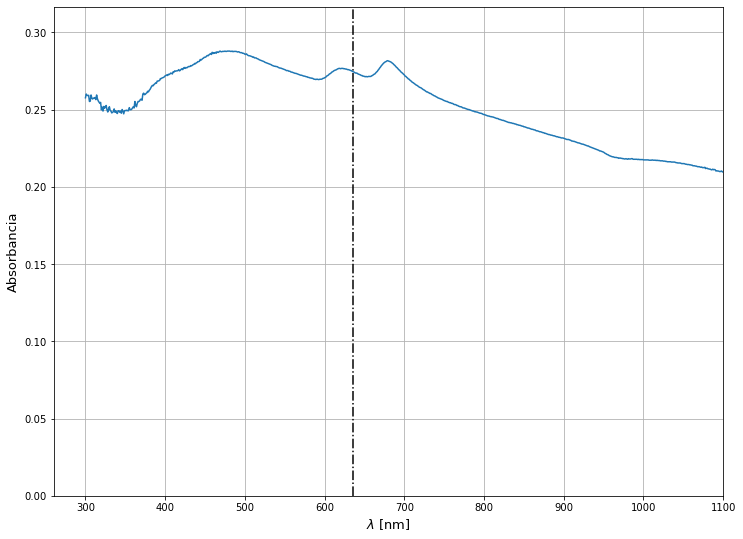

In [10]:
dispersiones["D4"] = "Absorbancia_31-08MoS2.csv"
C_4 = extraer_datos(dispersiones["D4"],dilucion=2)
concentraciones.append(C_4)
# plt.xlim(250,1200)
# plt.ylim(0,0.17)

Absorbancia_31-08MoS2(R).csv
Concentración: 0.007mg/mL


(0.0, 0.045)

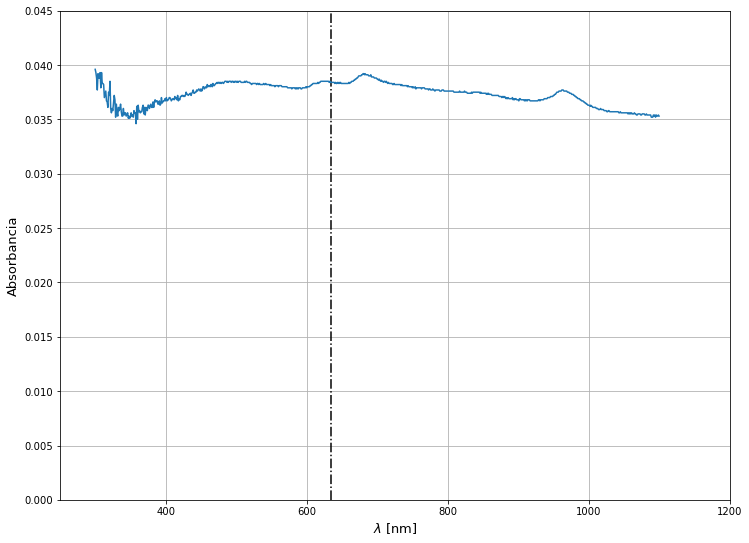

In [11]:
dispersiones["D5"] = "Absorbancia_31-08MoS2(R).csv"
C_5 = extraer_datos(dispersiones["D5"])
concentraciones.append(C_5)
plt.xlim(250,1200)
plt.ylim(0,0.045)

Absorbancia_02-09MoS2(Try3).csv
Concentración: 0.037mg/mL


(0.0, 0.23)

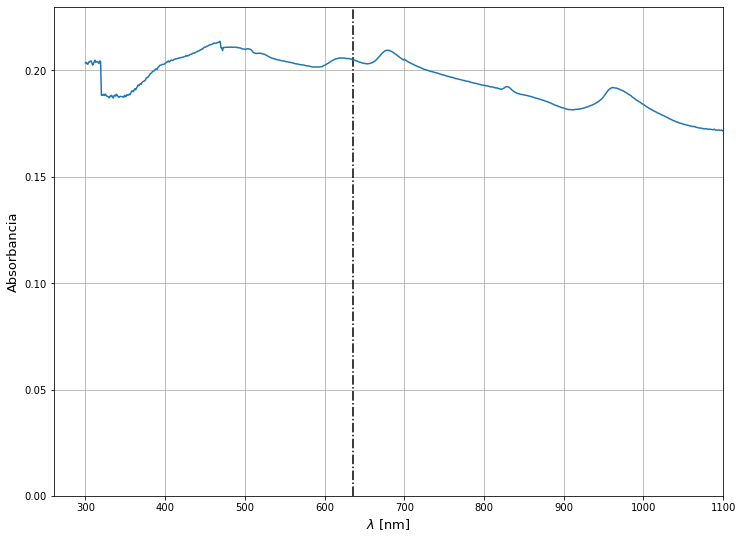

In [12]:
# datos6a = pd.read_csv("Absorbancia_02-09MoS2(Try1).csv",sep=';')
# datos6a = datos6a.drop(0)
# datos6a = datos6a.drop('Unnamed: 2',axis=1)
# datos6a = datos6a.astype(float)

# datos6b = pd.read_csv("Absorbancia_02-09MoS2(Try2).csv",sep=';')
# datos6b = datos6b.drop(0)
# datos6b = datos6b.drop('Unnamed: 2',axis=1)
# datos6b = datos6b.astype(float)

# datos6c = pd.read_csv("Absorbancia_02-09MoS2(Try3).csv",sep=';')
# datos6c = datos6c.drop(0)
# datos6c = datos6c.drop('Unnamed: 2',axis=1)
# datos6c = datos6c.astype(float)


# data = datos6a.to_numpy()
# plt.plot(data[:,0],data[:,1])

# data = datos6b.to_numpy()
# plt.plot(data[:,0],data[:,1])
# data = datos6c.to_numpy()
# plt.plot(data[:,0],data[:,1])

# # plt.xlim(250,1200)
# # plt.ylim(0.03,0.04)

# peak = data[data[:,0]==635.0]
# A = peak[0,1]
# C_6 = A/5.51*2
# C_6

dispersiones["D6"] = "Absorbancia_02-09MoS2(Try3).csv"
C_6 = extraer_datos(dispersiones["D6"])
concentraciones.append(C_6)
plt.ylim(0,0.23)

## MoS2 Li

Absorbancia_07-09MoS2(Li).csv
Concentración: 0.023mg/mL


(0.08, 0.14)

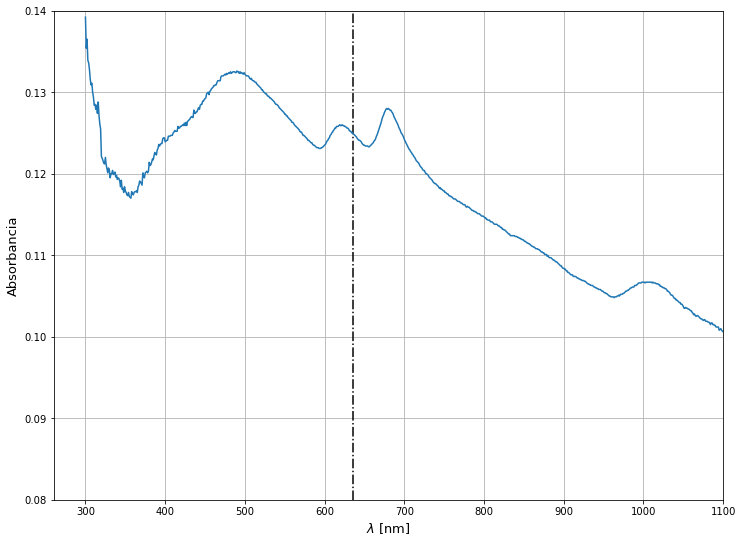

In [13]:
dispersiones["D7"] = "Absorbancia_07-09MoS2(Li).csv"
C_7 = extraer_datos(dispersiones["D7"])
concentraciones.append(C_7)
plt.ylim(0.08,0.14)

Absorbancia_13-09MoS2(Li)(True).csv
Concentración: 0.083mg/mL


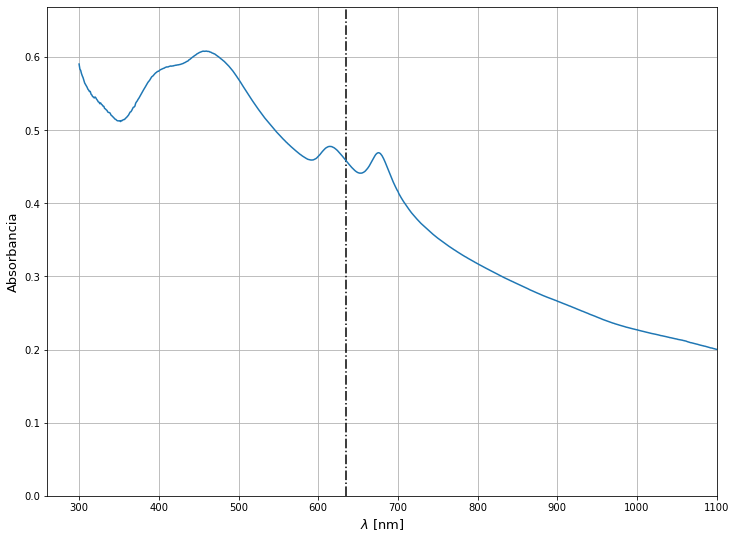

In [14]:
dispersiones["D8"] = "Absorbancia_13-09MoS2(Li)(True).csv"
C_8 = extraer_datos(dispersiones["D8"])
concentraciones.append(C_8)

Absorbancia_14-09MoS2(Li).csv
Concentración: 0.158mg/mL


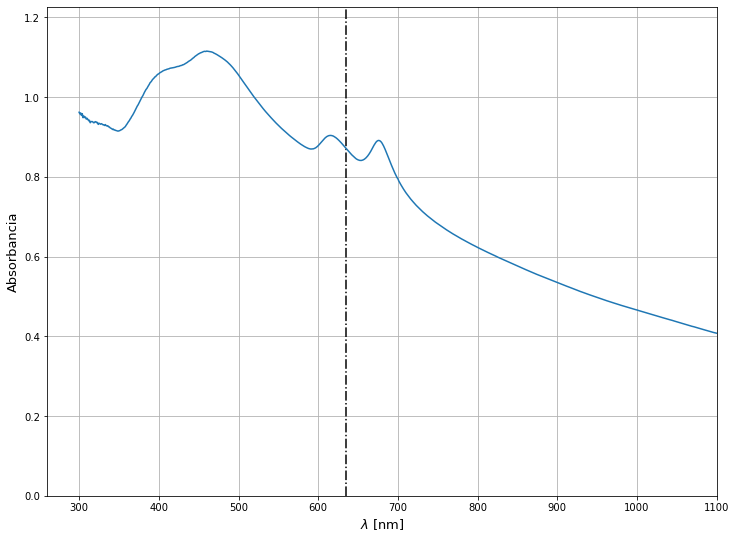

In [15]:
dispersiones["D9"] = "Absorbancia_14-09MoS2(Li).csv"
C_9 = extraer_datos(dispersiones["D9"])
concentraciones.append(C_9)

Absorbancia_15-09MoS2(Li).csv
Concentración: 0.063mg/mL


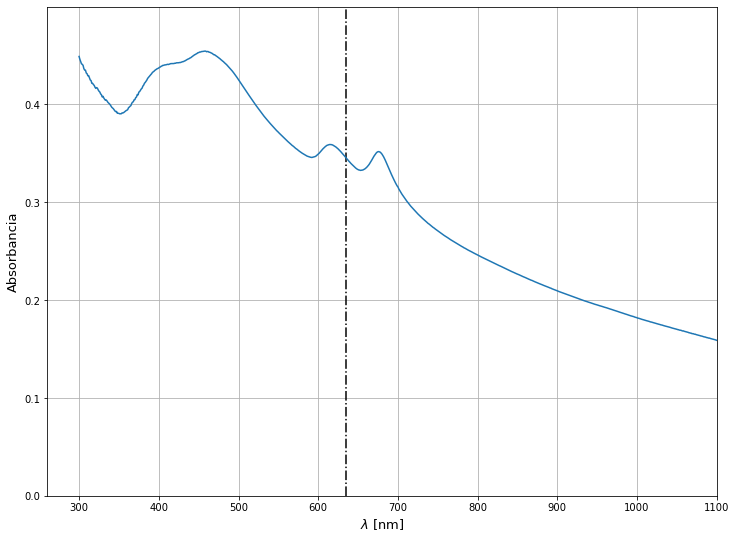

In [16]:
dispersiones["D10"] = "Absorbancia_15-09MoS2(Li).csv"
C_10 = extraer_datos(dispersiones["D10"])
concentraciones.append(C_10)

Absorbancia_16-09MoS2(Li).csv
Concentración: 0.066mg/mL


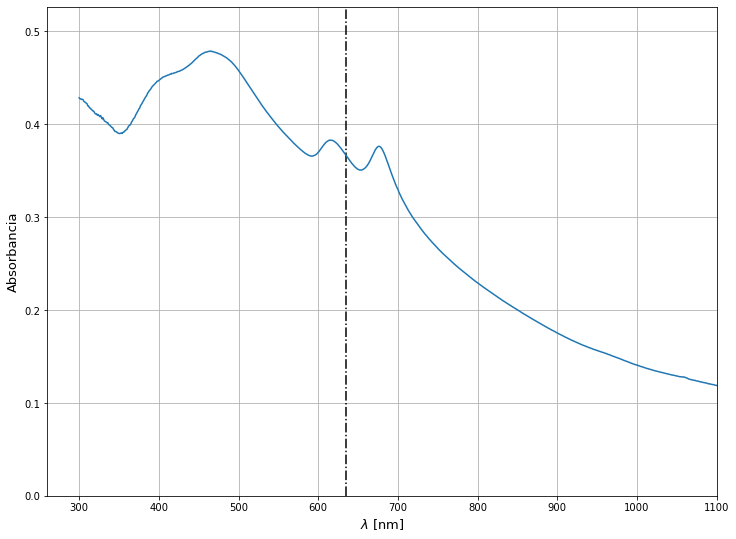

In [17]:
dispersiones["D11"] = "Absorbancia_16-09MoS2(Li).csv"
C_11 = extraer_datos(dispersiones["D11"])
concentraciones.append(C_11)

Absorbancia_25-09MoS2(Li).csv
Concentración: 0.089mg/mL


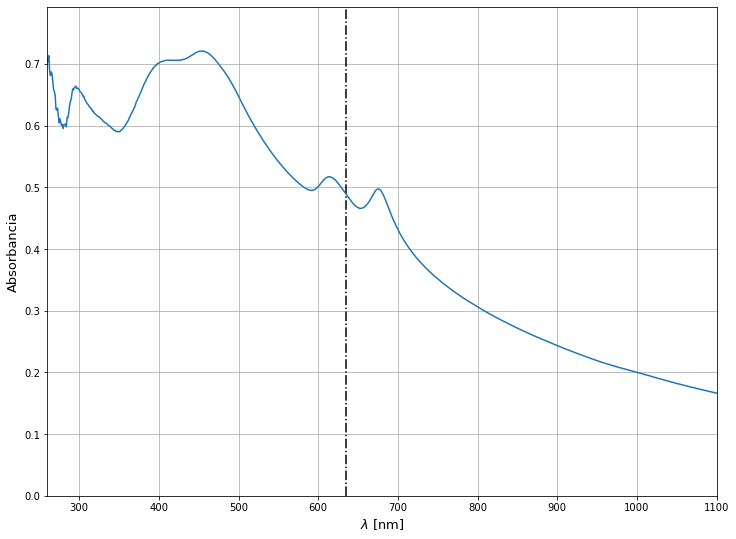

In [18]:
dispersiones["D12"] = "Absorbancia_25-09MoS2(Li).csv"
C_12 = extraer_datos(dispersiones["D12"])
concentraciones.append(C_12)

Absorbancia_27-09MoS2(SinTransferir).csv
Concentración: 0.061mg/mL


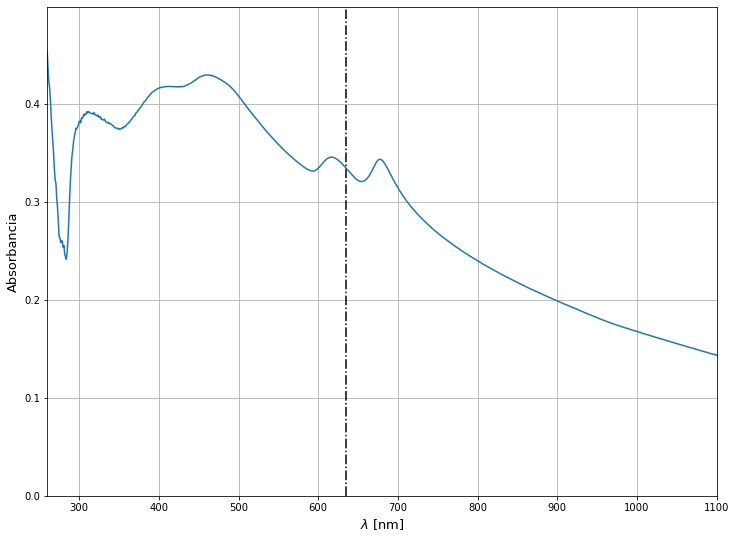

In [19]:
dispersiones["D13"] = "Absorbancia_27-09MoS2(SinTransferir).csv"
C_13 = extraer_datos(dispersiones["D13"])
concentraciones.append(C_13)

Absorbancia_12-10MoS2(Try2).csv
Concentración: 0.082mg/mL


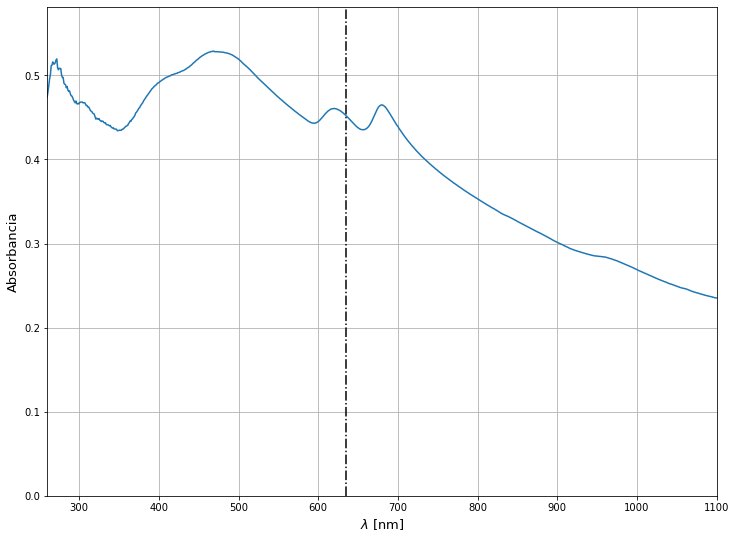

In [20]:
#12-10 is 06-10
dispersiones["D14"] = "Absorbancia_12-10MoS2(Try2).csv"
# dispersiones["D14"] = "Absorbancia_06-10MoS2(SinTransferir).csv"
C_14 = extraer_datos(dispersiones["D14"])
concentraciones.append(C_14)

Absorbancia_15-10MoS2(Li).csv
Concentración: 0.182mg/mL


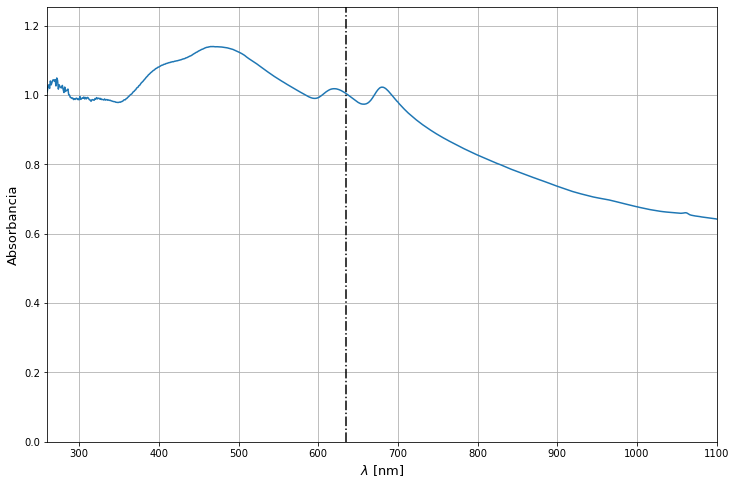

In [21]:
plt.figure(figsize=(12,8))
dispersiones["D15"] = "Absorbancia_15-10MoS2(Li).csv"
C_15 = extraer_datos(dispersiones["D15"],auto_shape=False,label='Hoy')
concentraciones.append(C_15)
# dispersiones["D14"] = "Absorbancia_06-10MoS2(SinTransferir).csv"
# C_14 = extraer_datos(dispersiones["D14"],auto_shape=False,label='Sucia')
# dispersiones["D9"] = "Absorbancia_14-09MoS2(Li).csv"
# C_9 = extraer_datos(dispersiones["D9"],auto_shape=False,label='Limpia')
# plt.legend()

Absorbancia_20-10MoS2(Li).csv
Concentración: 0.142mg/mL


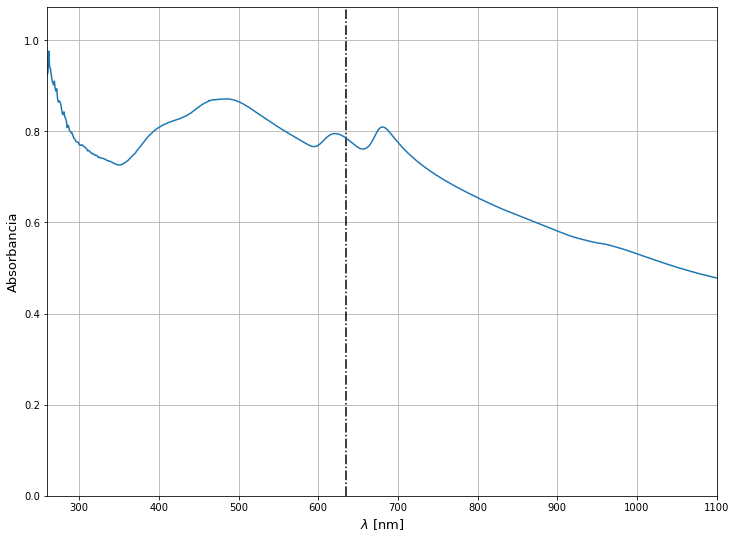

In [22]:
dispersiones["D16"] = "Absorbancia_20-10MoS2(Li).csv"
C_16 = extraer_datos(dispersiones["D16"])
concentraciones.append(C_16)

Absorbancia_26-10MoS2(Li).csv
Concentración: 0.070mg/mL


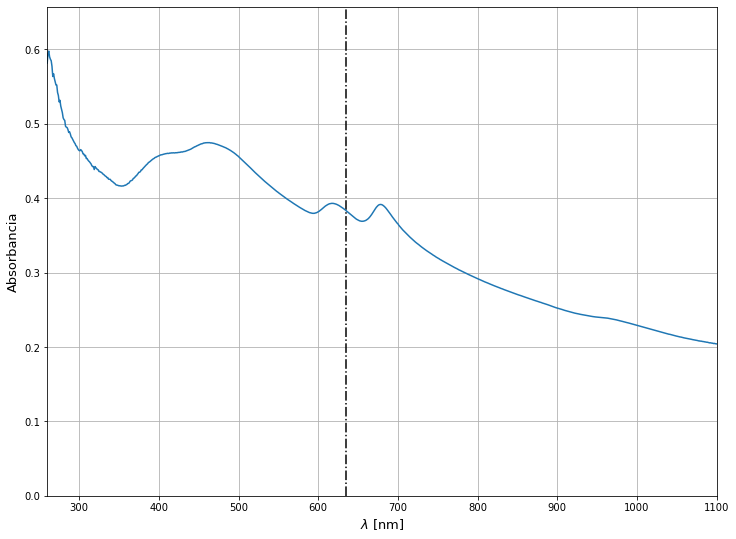

In [23]:
dispersiones["D17"] = "Absorbancia_26-10MoS2(Li).csv"
C_17 = extraer_datos(dispersiones["D17"])
concentraciones.append(C_17)

Absorbancia_28-10MoS2(Li).csv
Concentración: 0.058mg/mL


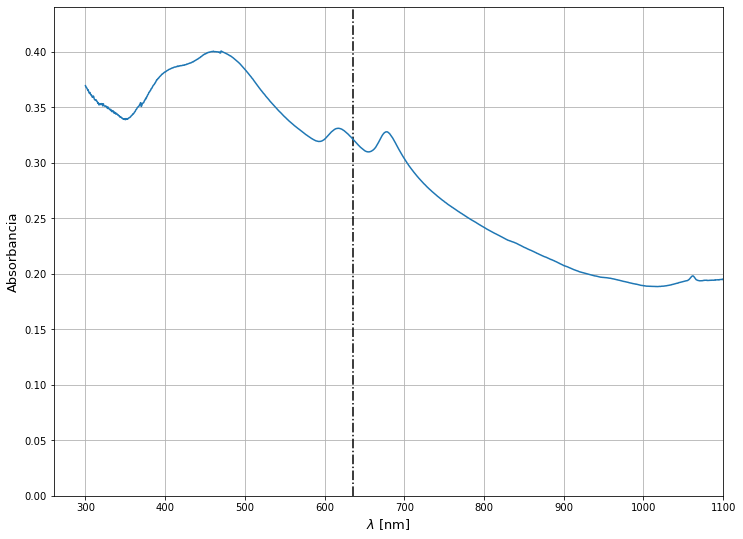

In [24]:
dispersiones["D18"] = "Absorbancia_28-10MoS2(Li).csv"
C_18 = extraer_datos(dispersiones["D18"])
concentraciones.append(C_18)

Absorbancia_02-11MoS2(Li).csv
Concentración: 0.123mg/mL


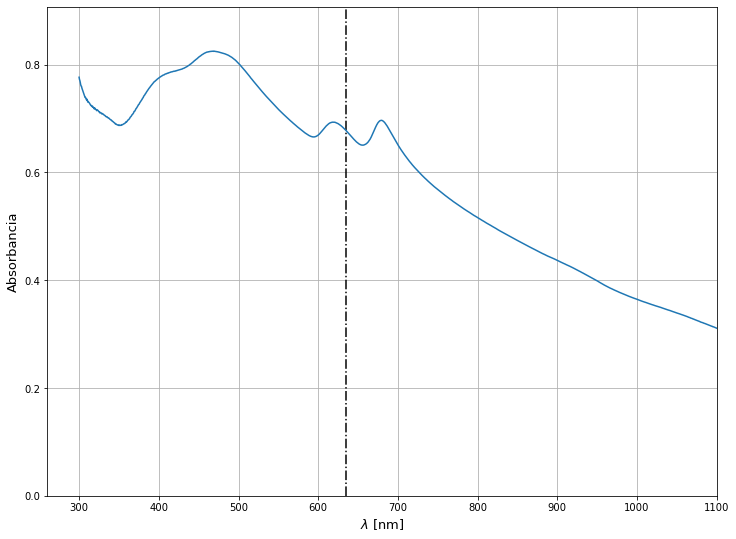

In [25]:
dispersiones["D19"] = "Absorbancia_02-11MoS2(Li).csv"
C_19 = extraer_datos(dispersiones["D19"])
concentraciones.append(C_19)

Absorbancia_03-11MoS2(Li).csv
Concentración: 0.288mg/mL


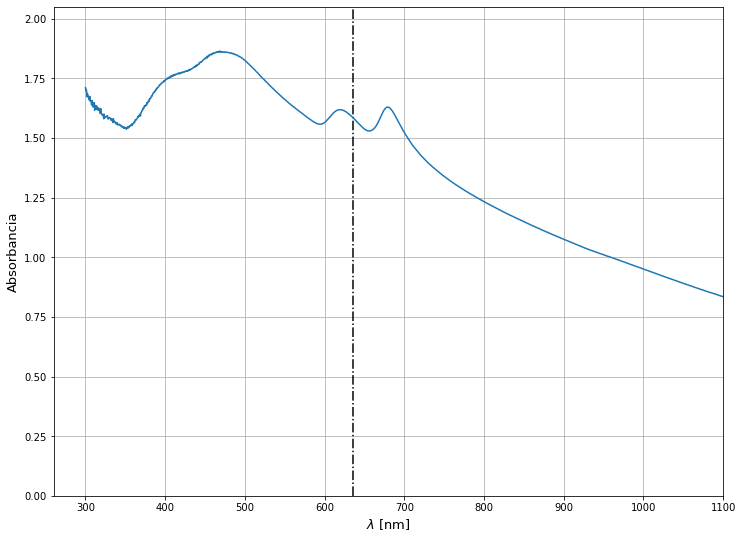

In [26]:
dispersiones["D20"] = "Absorbancia_03-11MoS2(Li).csv"
C_20 = extraer_datos(dispersiones["D20"])
concentraciones.append(C_20)

Absorbancia_08-11MoS2(Li).csv
Concentración: 0.263mg/mL


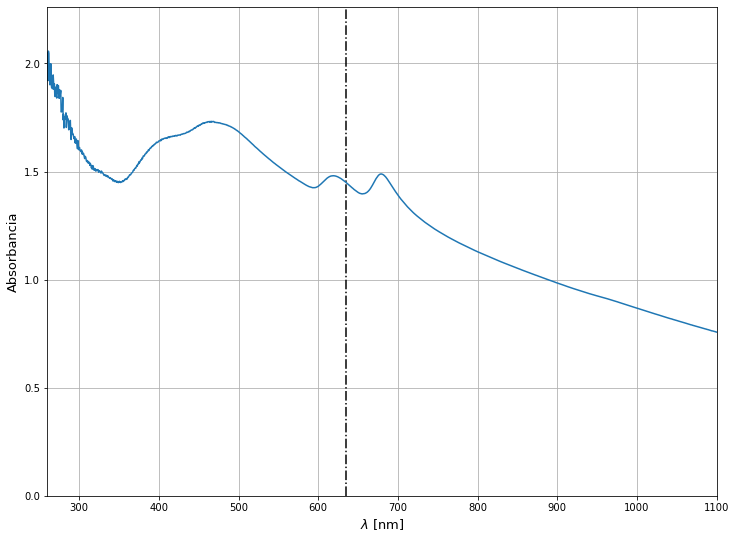

In [27]:
dispersiones["D21"] = "Absorbancia_08-11MoS2(Li).csv"
C_21 = extraer_datos(dispersiones["D21"])
concentraciones.append(C_21)

Absorbancia_10-11MoS2(Li).csv
Concentración: 0.197mg/mL


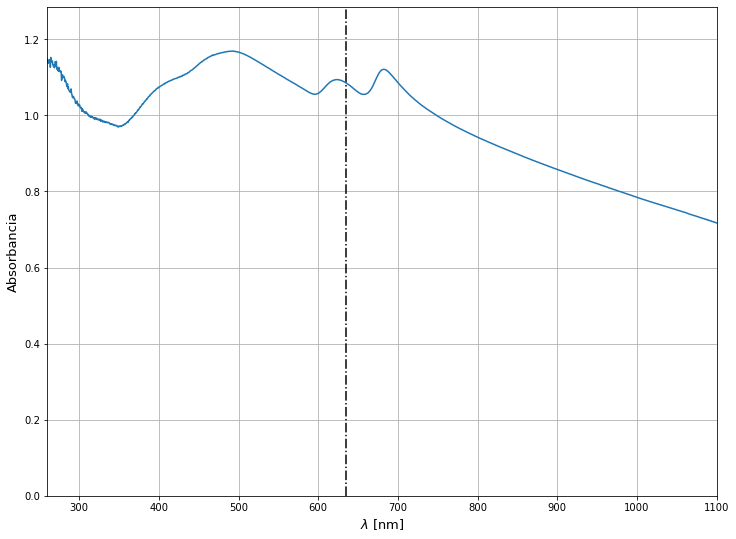

In [28]:
dispersiones["D22"] = "Absorbancia_10-11MoS2(Li).csv"
C_22 = extraer_datos(dispersiones["D22"])
concentraciones.append(C_22)

## Registro

In [29]:
llaves = list(dispersiones.keys())

print('Referencias')
for i in dispersiones.items():
    print('\t',i)

# concentraciones = np.array([C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,C_11,C_12,C_13,C_14,C_15,C_16,C_17,C_18,C_19])
concentraciones2 = np.array(concentraciones)
dict_concentraciones = {llaves[i]:concentraciones2[i] for i in range(len(llaves))}

dict_volumenes = {'D1':0,'D2':0,'D3':5,'D4':3,'D5':15,'D6':17,'D7':27.5,'D8':10,'D9':5,'D10':7.5,'D11':3,'D12':10,'D13':0,'D14':10,'D15':35,
                  'D16':32.5, 'D17':35, 'D18':35, 'D19':45, 'D20':35, 'D21':35, 'D22':32.5}
volumenes = np.array(list(dict_volumenes.values()))

print("\n")
# print("Volumenes: \n")
# for i in dict_volumenes.items():
#     print('\t',i)
# print("\n")
print('Volumenes: \n\t:',list(dict_volumenes.items()),'\n')

print("Concentraciones: \n")
for i in dict_concentraciones.items():
    print('\t',i)

cantidades = concentraciones2*volumenes
dict_cantidades = {llaves[i]:cantidades[i] for i in range(len(llaves))}
cantidad_MoS2 = np.sum(cantidades)

print("\n")
print("Cantidades: \n")

for i in dict_cantidades.items():
    print('\t',i)

print("\n")
print("Cantidad total: \n\t {:.3f}mg".format(cantidad_MoS2))

Referencias
	 ('D1', 'Absorbancia_19-08MoS2(2).csv')
	 ('D2', 'Absorbancia_25-08MoS2.csv')
	 ('D3', 'Absorbancia_26-08MoS2(True).csv')
	 ('D4', 'Absorbancia_31-08MoS2.csv')
	 ('D5', 'Absorbancia_31-08MoS2(R).csv')
	 ('D6', 'Absorbancia_02-09MoS2(Try3).csv')
	 ('D7', 'Absorbancia_07-09MoS2(Li).csv')
	 ('D8', 'Absorbancia_13-09MoS2(Li)(True).csv')
	 ('D9', 'Absorbancia_14-09MoS2(Li).csv')
	 ('D10', 'Absorbancia_15-09MoS2(Li).csv')
	 ('D11', 'Absorbancia_16-09MoS2(Li).csv')
	 ('D12', 'Absorbancia_25-09MoS2(Li).csv')
	 ('D13', 'Absorbancia_27-09MoS2(SinTransferir).csv')
	 ('D14', 'Absorbancia_12-10MoS2(Try2).csv')
	 ('D15', 'Absorbancia_15-10MoS2(Li).csv')
	 ('D16', 'Absorbancia_20-10MoS2(Li).csv')
	 ('D17', 'Absorbancia_26-10MoS2(Li).csv')
	 ('D18', 'Absorbancia_28-10MoS2(Li).csv')
	 ('D19', 'Absorbancia_02-11MoS2(Li).csv')
	 ('D20', 'Absorbancia_03-11MoS2(Li).csv')
	 ('D21', 'Absorbancia_08-11MoS2(Li).csv')
	 ('D22', 'Absorbancia_10-11MoS2(Li).csv')


Volumenes: 
	: [('D1', 0), ('D2', 0)

# Calculo de volúmenes

In [30]:
print(dispersiones['D20'],'Grafeno')
phi_values = [0,0.01,0.05,0.1,0.15,0.2]
m = 0.6

volumen_mos2 = 0

for phi in phi_values:
    vols = calcular_volumenes(C_20,C_G,phi,m)
    volumen_mos2 += vols[0]*3
    print('{}mg; {:.0f}%wt-G;'.format(m,phi*100),vols)
print(volumen_mos2)
    

calcular_espesor(m,0.2)
#C4,C3
# 971 + 10*1000
# 50 + 58.7

Absorbancia_03-11MoS2(Li).csv Grafeno
0.6mg; 0%wt-G; (2.083, 0.0)
0.6mg; 1%wt-G; (2.062, 3.7)
0.6mg; 5%wt-G; (1.979, 18.3)
0.6mg; 10%wt-G; (1.875, 36.5)
0.6mg; 15%wt-G; (1.771, 54.8)
0.6mg; 20%wt-G; (1.667, 73.0)
34.311


651.8590188073812

# Gráficas misceláneas

Absorbancia_14-09Nestea.csv


<Figure size 864x648 with 0 Axes>

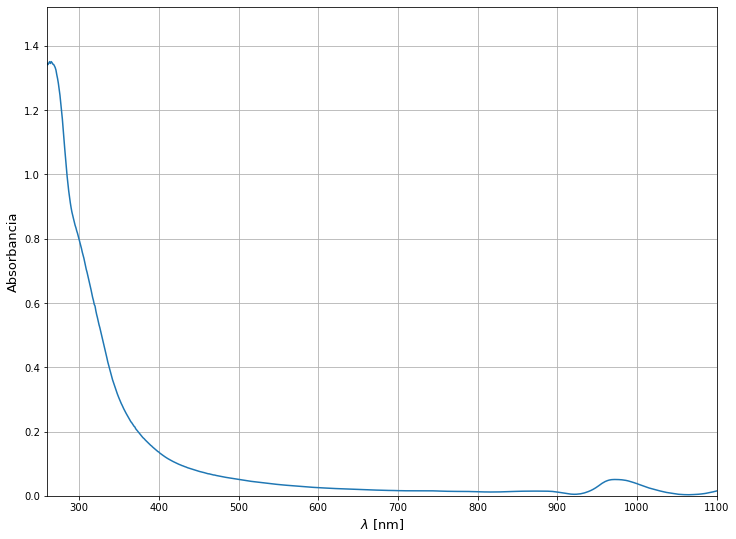

In [31]:
plt.figure(figsize=(12,9))
extraer_datos("Absorbancia_14-09Nestea.csv",concentracion=False)
# plt.savefig('Absorbancia_nestea.svg',bbox_inches='tight')

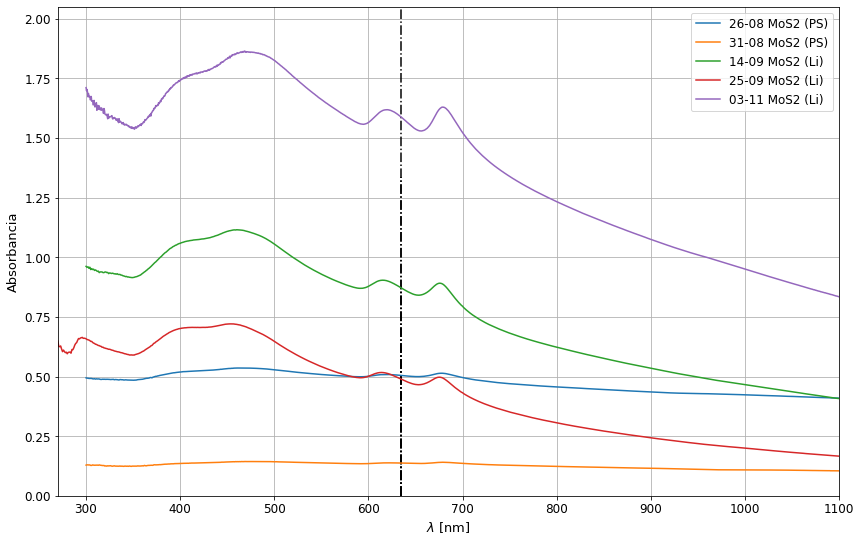

In [8]:
plt.figure(figsize=(14,9))
extraer_datos('Absorbancia_26-08MoS2(True).csv',label='26-08 MoS2 (PS)',auto_shape=False,display_only=True)
extraer_datos('Absorbancia_31-08MoS2.csv',label='31-08 MoS2 (PS)',auto_shape=False,display_only=True)
extraer_datos('Absorbancia_14-09MoS2(Li).csv',label='14-09 MoS2 (Li)',auto_shape=False,display_only=True)
extraer_datos('Absorbancia_25-09MoS2(Li).csv',label='25-09 MoS2 (Li)',auto_shape=False,display_only=True)
extraer_datos('Absorbancia_03-11MoS2(Li).csv',label='03-11 MoS2 (Li)',auto_shape=False,display_only=True)
# plt.grid()
# plt.ylim(0,1.15)
plt.xlim(270,1100)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Absorbancia_muestreo.svg',bbox_inches='tight')

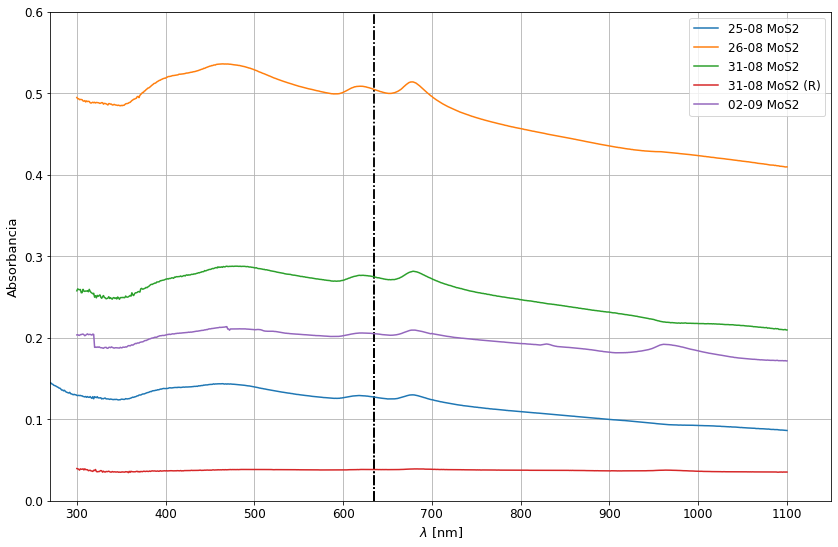

In [9]:
plt.figure(figsize=(14,9))
# extraer_datos('Absorbancia_19-08MoS2(2).csv')
extraer_datos('Absorbancia_25-08MoS2.csv',label='25-08 MoS2',auto_shape=False,display_only=True)
extraer_datos('Absorbancia_26-08MoS2(True).csv',label='26-08 MoS2',auto_shape=False,display_only=True)
extraer_datos('Absorbancia_31-08MoS2.csv',label='31-08 MoS2',auto_shape=False,display_only=True,dilucion=2)
extraer_datos('Absorbancia_31-08MoS2(R).csv',label='31-08 MoS2 (R)',auto_shape=False,display_only=True)
extraer_datos('Absorbancia_02-09MoS2(Try3).csv',label='02-09 MoS2',auto_shape=False,display_only=True)
plt.xlim(270,1150)
plt.ylim(0,0.6)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Absorbancia_PS.svg',bbox_inches='tight')

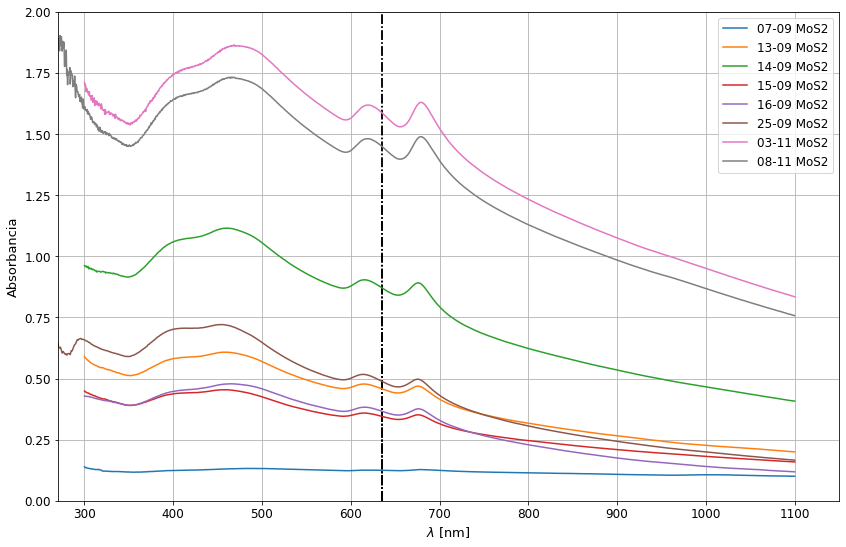

In [10]:
plt.figure(figsize=(14,9))
extraer_datos('Absorbancia_07-09MoS2(Li).csv',label='07-09 MoS2',auto_shape=False,display_only=True)
extraer_datos('Absorbancia_13-09MoS2(Li)(True).csv',label='13-09 MoS2',auto_shape=False,display_only=True)
extraer_datos('Absorbancia_14-09MoS2(Li).csv',label='14-09 MoS2',auto_shape=False,display_only=True)
extraer_datos('Absorbancia_15-09MoS2(Li).csv',label='15-09 MoS2',auto_shape=False,display_only=True)
extraer_datos('Absorbancia_16-09MoS2(Li).csv',label='16-09 MoS2',auto_shape=False,display_only=True)
extraer_datos('Absorbancia_25-09MoS2(Li).csv',label='25-09 MoS2',auto_shape=False,display_only=True)
extraer_datos("Absorbancia_03-11MoS2(Li).csv",label='03-11 MoS2',auto_shape=False,display_only=True)
extraer_datos("Absorbancia_08-11MoS2(Li).csv",label='08-11 MoS2',auto_shape=False,display_only=True)
plt.xlim(270,1150)
plt.ylim(0,2)
plt.grid()
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Absorbancia_Li.svg',bbox_inches='tight')

In [35]:
print(np.mean(concentraciones[1:7]),np.mean(concentraciones[7:-1]))

0.038566243194192384 0.12344568317345088
